# Run YOLO V3 on Colab for images/videos

Hello there,
Today, we will be discussing how can we use the Darknet project on Google Colab platform. For those who are not familiar with these terms:

- The Darknet project is an open-source written in C, which is a framework to develop deep neural networks.
- Yolo V3 is an object detection algorithm. It is one of the state of the art solution when **accuracy/processing power needed** metric is considered.
- Google Cola is a cloud-based data science workspace similar to the jupyter notebook. Each Collabrotary session is equipped with a virtual machine running 13 GB of ram and either a CPU, GPU, or TPU processor. In most case, all the required packages are already installed on these machines and you can quite easily start development using Google Collaboratory. It saves us from installing process and it provides us **easy to accessible GPU's** which is also **free** under some constraints.

Have a look Ted Talk by Joseph Redmon the developer of the darknet project. The talk is about Darknet and YOLO projects which titled as “How computers learn to recognize objects instantly” . Darknet project aims to create a new neural network framework which is completely focused on simplicity and performance. The thing which I like about is its clarity and performance. All the code is written in C, to define a deep learning network you should only create a config file which defines the layers. By this way, it does not lose its performance capabilities also it provides us easy to use interface for development with this library.

Since I love both YOLO project and Google Colab, I decided to create a tutorial to use them together. I create a GitHub repository and a Collaboratory notebook for this purpose

- [Colab Notebook](https://colab.research.google.com/drive/1DcXQ_pLtLVvQAwILZR-kF0ZJwhkp11Jl)
- [mozanunal/yoloOnGoogleColab](https://github.com/mozanunal/yoloOnGoogleColab)

{% youtube Cgxsv1riJhI%}

**Please check**
- [YOLO website](https://pjreddie.com/darknet/yolo/)
- [Darknet website](https://pjreddie.com/darknet/)
- [YOLOV3 Paper](https://arxiv.org/abs/1804.02767)



## Install
Go to the directory, clear and install everthing


*   Clone the project
*   Change make file configurations and make OPENCV and GPU enable
*   Install opencv library


In [4]:

import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline
  

In [3]:

!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

3rdparty	DarknetConfig.cmake.in	include		       results
build		darknet_images.py	json_mjpeg_streams.sh  scripts
build.ps1	darknet.py		LICENSE		       src
build.sh	darknet_video.py	Makefile	       video_yolov3.sh
cfg		data			net_cam_v3.sh	       video_yolov4.sh
cmake		image_yolov3.sh		net_cam_v4.sh
CMakeLists.txt	image_yolov4.sh		README.md
Cloning into 'darknet'...
remote: Enumerating objects: 14370, done.
remote: Total 14370 (delta 0), reused 0 (delta 0), pack-reused 14370
Receiving objects: 100% (14370/14370), 13.09 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (9771/9771), done.
/content/darknet/darknet
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://devel

## `Compile and Configure`


* Compile YOLO
* Download YOLO weights



In [5]:
!make &> compile.log


In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-08 04:54:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  3.04MB/s    in 3m 2s   

2020-11-08 04:57:39 (1.30 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## Test An Image

In [13]:
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread(imageDir)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [8]:
!pwd
!find -name predictions.jpg


/content/darknet/darknet


In [9]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
!ls

--2020-11-08 04:57:39--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg [following]
--2020-11-08 04:57:39--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68535 (67K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  66.93K  --.-KB/s    in 0.003s  

2020-11-08 04:57:40 (24.3 MB/s) - ‘test.jpg’ saved [68535/68535]

3rdparty	compile.log		image_yolov4.sh        READM

## Test with Video

--2020-11-08 05:06:52--  https://c7.alamy.com/comp/B54E0C/a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg
Resolving c7.alamy.com (c7.alamy.com)... 13.32.204.70, 13.32.204.117, 13.32.204.60, ...
Connecting to c7.alamy.com (c7.alamy.com)|13.32.204.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg.2’

a-violinist-plays-t     [ <=>                ] 212.36K  --.-KB/s    in 0.004s  

Last-modified header invalid -- time-stamp ignored.
2020-11-08 05:06:52 (48.0 MB/s) - ‘a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg.2’ saved [217459]



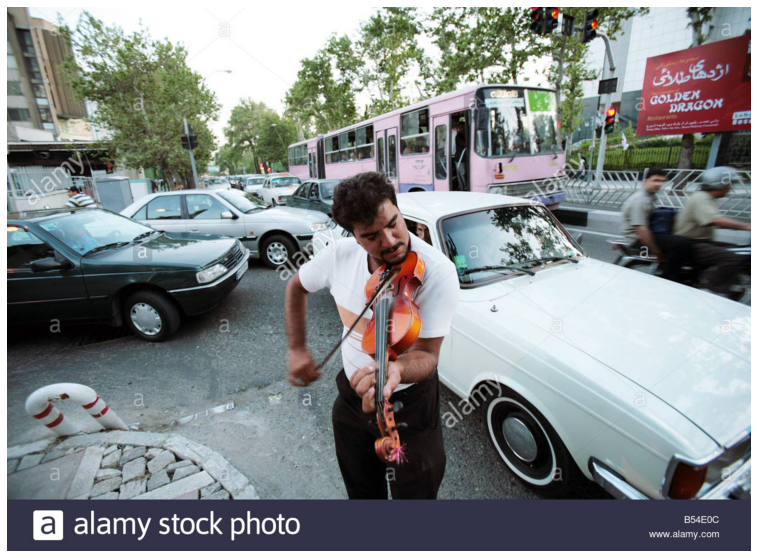

In [14]:
!wget https://c7.alamy.com/comp/B54E0C/a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg
predictImage("a-violinist-plays-to-drivers-in-the-tehran-traffic-local-caption-iran-B54E0C.jpg")

In [12]:
!wget https://c7.alamy.com/comp/B54E02/day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg
predictImage("day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg")

--2020-11-08 05:05:38--  https://c7.alamy.com/comp/B54E02/day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg
Resolving c7.alamy.com (c7.alamy.com)... 13.32.204.70, 13.32.204.117, 13.32.204.60, ...
Connecting to c7.alamy.com (c7.alamy.com)|13.32.204.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg’

day-long-traffic-ja     [  <=>               ] 239.67K   853KB/s    in 0.3s    

Last-modified header invalid -- time-stamp ignored.
2020-11-08 05:05:39 (853 KB/s) - ‘day-long-traffic-jams-in-tehran-iran-local-caption-iran-B54E02.jpg’ saved [245425]



AttributeError: ignored

In [ ]:
predictImage("test.jpg")



In [ ]:
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))


In [ ]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
!ls

In [ ]:
predictVideo("test.avi")


In [ ]:
!du -h res.avi

In [ ]:
from google.colab import files

files.download('/content/darknet/res.avi')



# Building the database by scraping the video of each car type and save yolo detection result as car type for database

We are going to Make databases on the following YouTube video:

In [ ]:
!pip3 install youtube_dl 

#@title
import os
from os.path import exists, join, basename, splitext 
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'xFLckB7vOQc' #(Ford Festiva)


YouTubeVideo(YOUTUBE_ID)

In [ ]:
%cd '/content/'
# %cd '/content/drive/My Drive/Torrent/'
# !rm -rf *.wav
# !youtube-dl  --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!youtube-dl --format "bestvideo+bestaudio[ext=m4a]/bestvideo+bestaudio/best" --merge-output-format mp4  --output "Ford_Festiva.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}

# !deepspeech --model deepspeech-0.6.1-models/output_graph.pbmm --lm deepspeech-0.6.1-models/lm.binary --trie deepspeech-0.6.1-models/trie --audio test.wav   --extended --json 
!ls

In [ ]:
# #  !./darknet detector valid cfg/voc.data yolo-voc.cfg yolo-voc.weights
# !./darknet detector test cfg/voc.data cfg/tiny-yolo-voc.cfg tiny-yolo-voc.weights data/dog.jpg
# !./darknet detect cfg/yolov3.cfg yolov3.weights

## Extracing the yolo results fro that vidoe

based of this post :
https://stackoverflow.com/questions/54520996/yolo-v3-how-to-extract-an-image-of-a-detected-object


In [ ]:
!pip install detect darknet

In [ ]:
import sys
sys.path.insert(1, "LD_LIBRARY_PATH=/usr/local/lib:/usr/local/cuda-10.1/targets/x86_64-linux/lib/ ./darknet detector train lamp.data yolov3-lamps.cfg darknet53.conv.74 -gpus 0,1,2,3,4,5,6,7")

In [ ]:
import cv2
import detect as dt
from darknet import Darknet
from PIL import Image

vidcap = cv2.VideoCapture('/content/Ford_Festiva.mp4')
success, image = vidcap.read()
count = 0

m = Darknet('/content/darknet/cfg/path.cfg')
m.load_weights('/content/darknet/yolov3.weights')
use_cuda = 1
m.cuda()

while success:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(image)
    im_pil = im_pil.resize((m.width, m.height))
    boxes = dt.do_detect(m, im_pil, 0.5, 0.4, use_cuda)

    result = open('your/save/file/path/frame%04d.txt'%(count), 'w')
    for i in range(len(boxes)):
        result.write(boxes[i])
    count = count + 1
    success, image = vidcap.read()
    result.close()

#Or these code:

https://stackoverflow.com/questions/60106315/how-can-i-capture-detected-image-of-object-yolov3-and-display-in-flask

In [ ]:
import cv2
import numpy as np
import os
import time
import detect as dt
from PIL import Image


labelsPath = os.path.sep.join(["/content/darknet/cfg", "coco.names"])
weightsPath = os.path.sep.join(["/content/darknet", "yolov3.weights"])
configPath = os.path.sep.join(["/content/darknet/cfg", "yolov3.cfg"])

labelsPath = os.path.sep.join(["/content/darknet/cfg", "coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")


net = cv2.dnn.readNet(configPath, weightsPath)

layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]


colors= np.random.uniform(0,255,size=(len(LABELS),3))

#loading image
cap0=cv2.VideoCapture('/content/Ford_Festiva.mp4')# 0) #0 for 1st webcam
cap1=cv2.VideoCapture('/content/Ford_Festiva.mp4')
font = cv2.FONT_HERSHEY_PLAIN
starting_time= time.time()
frame_id = 0
count = 0
use_cuda = 1
# configPath.cuda()

while True:
    ret0,frame0= cap0.read() # 
    ret1,frame1= cap1.read() # 

    image = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(image)
    im_pil = im_pil.resize((200, 200))
    boxes = dt.do_detect(image, im_pil, 0.5, 0.4, use_cuda)

    if (ret0):
        frame_id+=1
        #print(frame_id)

        height,width,channels = frame0.shape
        #print (frame.shape)
        #detecting objects
        blob = cv2.dnn.blobFromImage(frame0,0.00392,(320,320),(0,0,0),True,crop=False) #reduce 416 to 320    


        net.setInput(blob)
        outs = net.forward(outputlayers)
        #print(outs)
        print(outs[1])

        #Showing info on screen/ get confidence score of algorithm in detecting an object in blob
        class_ids=[]
        confidences=[]
        boxes=[]

        for out in outs:
            #print(out)
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                print(confidence)
                if confidence > 0.3:
                   
                    #onject detected
                    center_x= int(detection[0]*width)
                    center_y= int(detection[1]*height)
                    w = int(detection[2]*width)
                    h = int(detection[3]*height)

                    #cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
                    #rectangle co-ordinaters
                    x=int(center_x - w/2)
                    y=int(center_y - h/2)
                    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

                    boxes.append([x,y,w,h]) #put all rectangle areas
                    confidences.append(float(confidence)) #how confidence was that object detected and show that percentage
                    class_ids.append(class_id) #name of the object tha was detected

        indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.6)
        result = open('C:/Users/HP/Miniconda3/envs/count_vechicle/coding/images/frame%04d.txt'%(count), 'w')
        for i in range(len(boxes)):
            result.write(boxes[i])
            count = count + 1
            success, image = vidcap.read()
            result.close()
            if i in indexes:
                x,y,w,h = boxes[i]
                crop_img = frame0[y:y + h, x:x + w]
                cv2.imwrite('<filename>'+rand(1,100)+'jpg', crop_img)
                label = str(LABELS[class_ids[i]])
                confidence= confidences[i]
                color = colors[class_ids[i]]
                cv2.rectangle(frame0,(x,y),(x+w,y+h),color,2)
                cv2.putText(frame0,label+" "+str(round(confidence,2)),(x,y+30),font,1,(255,255,255),2)


        elapsed_time = time.time() - starting_time
        fps=frame_id/elapsed_time
        cv2.putText(frame0,"FPS:"+str(round(fps,2)),(10,50),font,2,(0,0,0),1)

        cv2.imshow("Image0",frame0)
        key = cv2.waitKey(1) #wait 1ms the loop will start again and we will process the next frame
        # crop_img = frame[y:y + h, x:x + w] #frame of video you are looping through
        # cv2.imwrite('<filename>'+rand(1,100)+'jpg', crop_img)
    if (ret1):
        cv2.imshow("Image1",frame1)
        key = cv2.waitKey(1) #wait 1ms the loop will start again and we will process the next frame
    if key == 27: #esc key stops the process
        break;

cap0.release()    
cap1.release()
cv2.destroyAllWindows()

In [ ]:
!find -name yolo-coco

#Saving the results in databse 
based of this question:
https://stackoverflow.com/questions/42984275/how-to-save-the-predictions-of-yolo-you-only-look-once-object-detection-in-a-j

And this gtihub project:
https://github.com/thtrieu/darkflow

In [ ]:
from darkflow.net.build import TFNet
import cv2

options = {"model": "cfg/yolo.cfg", "load": "bin/yolo.weights", "threshold": 0.1}

tfnet = TFNet(options)

imgcv = cv2.imread("./sample_img/sample_dog.jpg")
result = tfnet.return_predict(imgcv)
print(result)